# Pandas


`imports`, you've seen this before!

In [12]:
pip install matplotlib numpy pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sylvi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [14]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [15]:
plt.rcParams['figure.figsize'] = (10, 5)

In [16]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

# Data Project
Analysing the Shark Research Institute's dataset. The goal of this dataset is to inform people about the risks associated with coastal water activities, and to improve shark/human relations by educating people in factors that contribute to shark attacks. 

In [17]:
filepath = "GSAF5.xls.xlsx"

sad = pd.read_excel(filepath)
print("done")

done


SAD meaning Shark Attack Data
# 1. SHOW DATA SET

In [18]:
sad.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN


<AxesSubplot:>

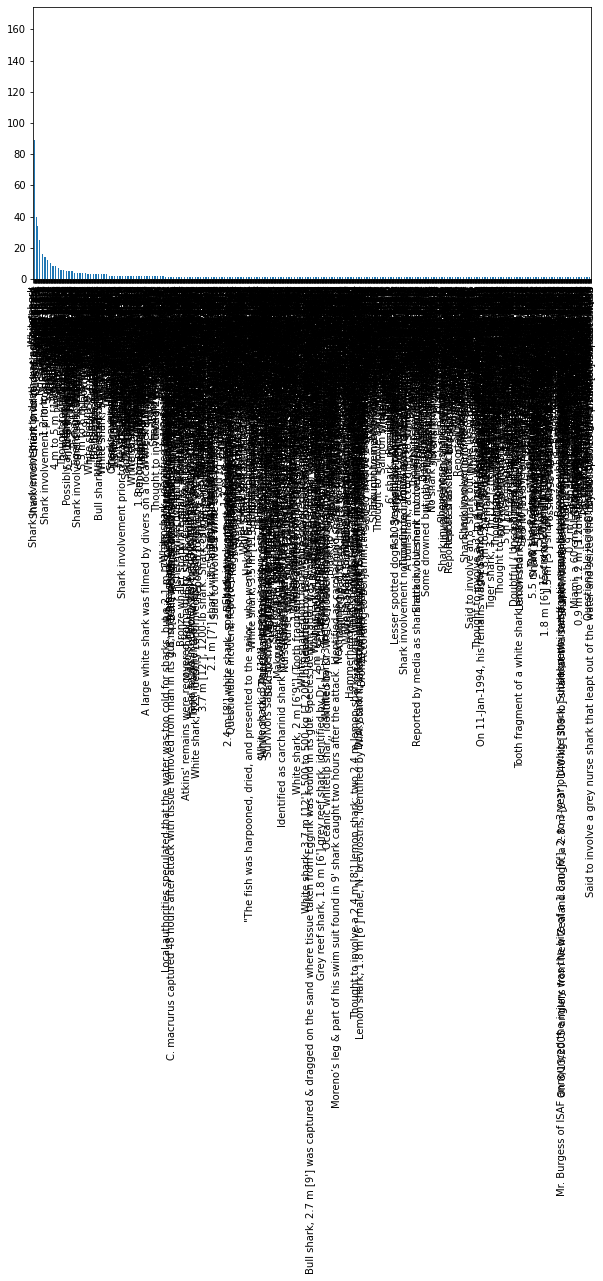

In [41]:
sad.Species.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Country'>

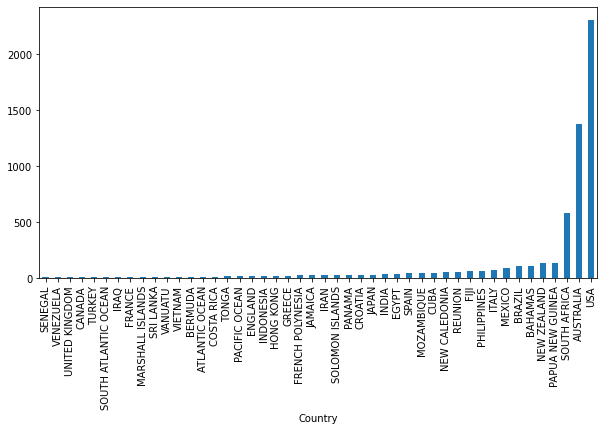

In [27]:
country_count = sad.groupby("Country").count().Date.sort_values()
country_count[country_count > 10].plot(kind="bar")

<AxesSubplot:xlabel='Year'>

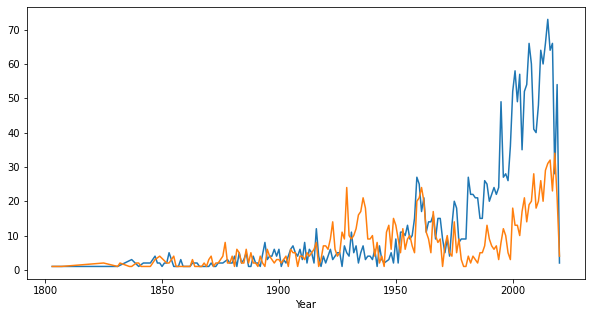

In [43]:
sad[(sad.Country == "USA") & (sad.Year < 2022) & (sad.Year > 1800)].groupby("Year").count().Date.plot()
sad[(sad.Country == "AUSTRALIA") & (sad.Year < 2022) & (sad.Year > 1800)].groupby("Year").count().Date.plot()


<AxesSubplot:xlabel='Year'>

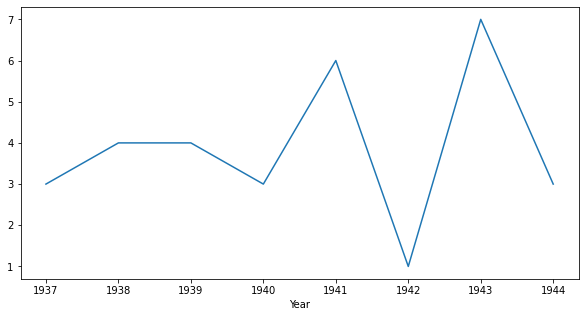

In [38]:
sad[(sad.Country == "USA") & (sad.Year < 1945) & (sad.Year > 1936)].groupby("Year").count().Date.plot()


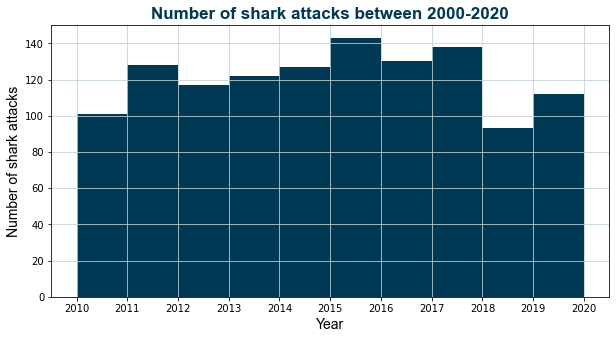

In [19]:
bins = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

plt.hist(sad["Year"], bins=bins, color='#013954')
plt.xticks(bins)

plt.ylabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.xlabel('Year', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.title('Number of shark attacks between 2000-2020', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.grid(True,color='#bfd2d9')

plt.show()

- During which months specificly were people being attacked? Summer, winter, etc...
 / colour code these colours accorddingly so we can clearly differenciate the seasons
 / Add a lengend/key

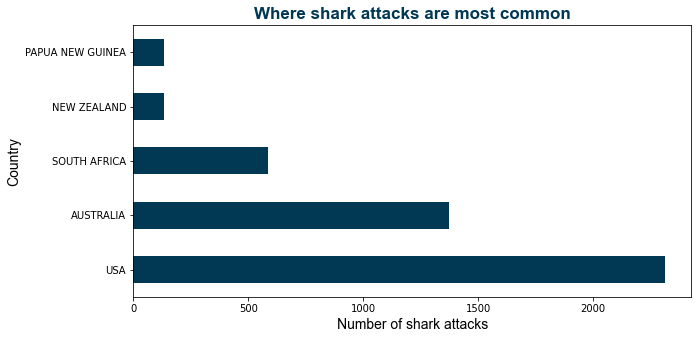

In [20]:
Season_attacks = sad['Country'].value_counts()[:5]
Season_attacks.plot(kind='barh', color='#013954')

plt.title('Where shark attacks are most common', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Country', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()

- Where are people being attack the most worldwide?
/ Top 10 list with numbers

- Looking more in Australia which states have the most attacked

HOW TO MAKE MONTH SPECIFIC DATA

- NSW look at a map and findout where /which locations are being attcked

 HOW DO I NARROW THIS DOWN TO AUSTRALIAN STATE????

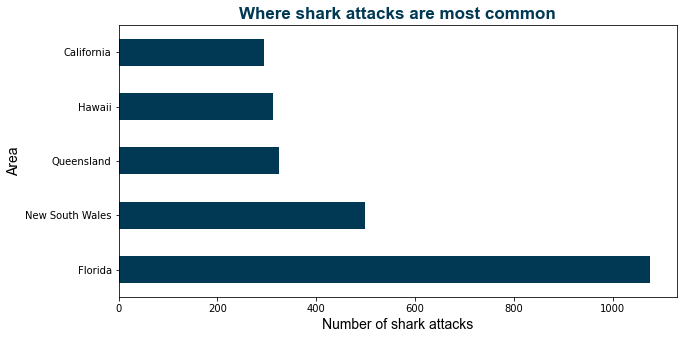

In [21]:
Season_attacks = sad['Area'].value_counts()[:5]
Season_attacks.plot(kind='barh', color='#013954')

plt.title('Where shark attacks are most common', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Area', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()

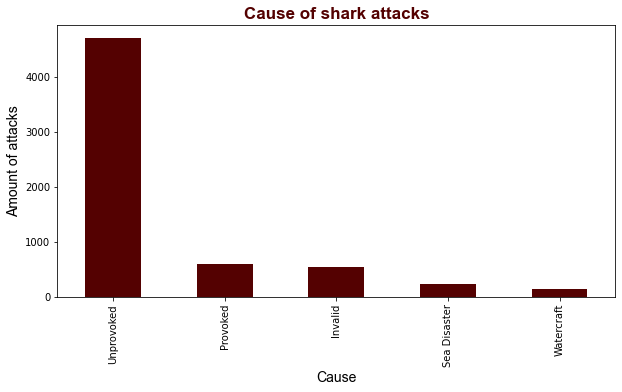

In [11]:
Season_attacks = sad['Type'].value_counts()[:5]
Season_attacks.plot(kind='barh', color='#540101')

plt.title('Cause of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#540101')
plt.xlabel('Cause', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Amount of attacks', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()